In [1]:
#importing the required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

from matplotlib import rcParams
from matplotlib.cm import rainbow

In [2]:
from sklearn.preprocessing import StandardScaler

In [20]:
#load the data
data = pd.read_csv("data.csv")

In [8]:
# print the number of rows and columns
print("This dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset contains 569 rows and 33 columns


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
# drop unnecessary columns 
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

#print the number of columns and rows
print("This dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

#change the target to numerical for help in the statistics
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

This dataset contains 569 rows and 31 columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
#check the data types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

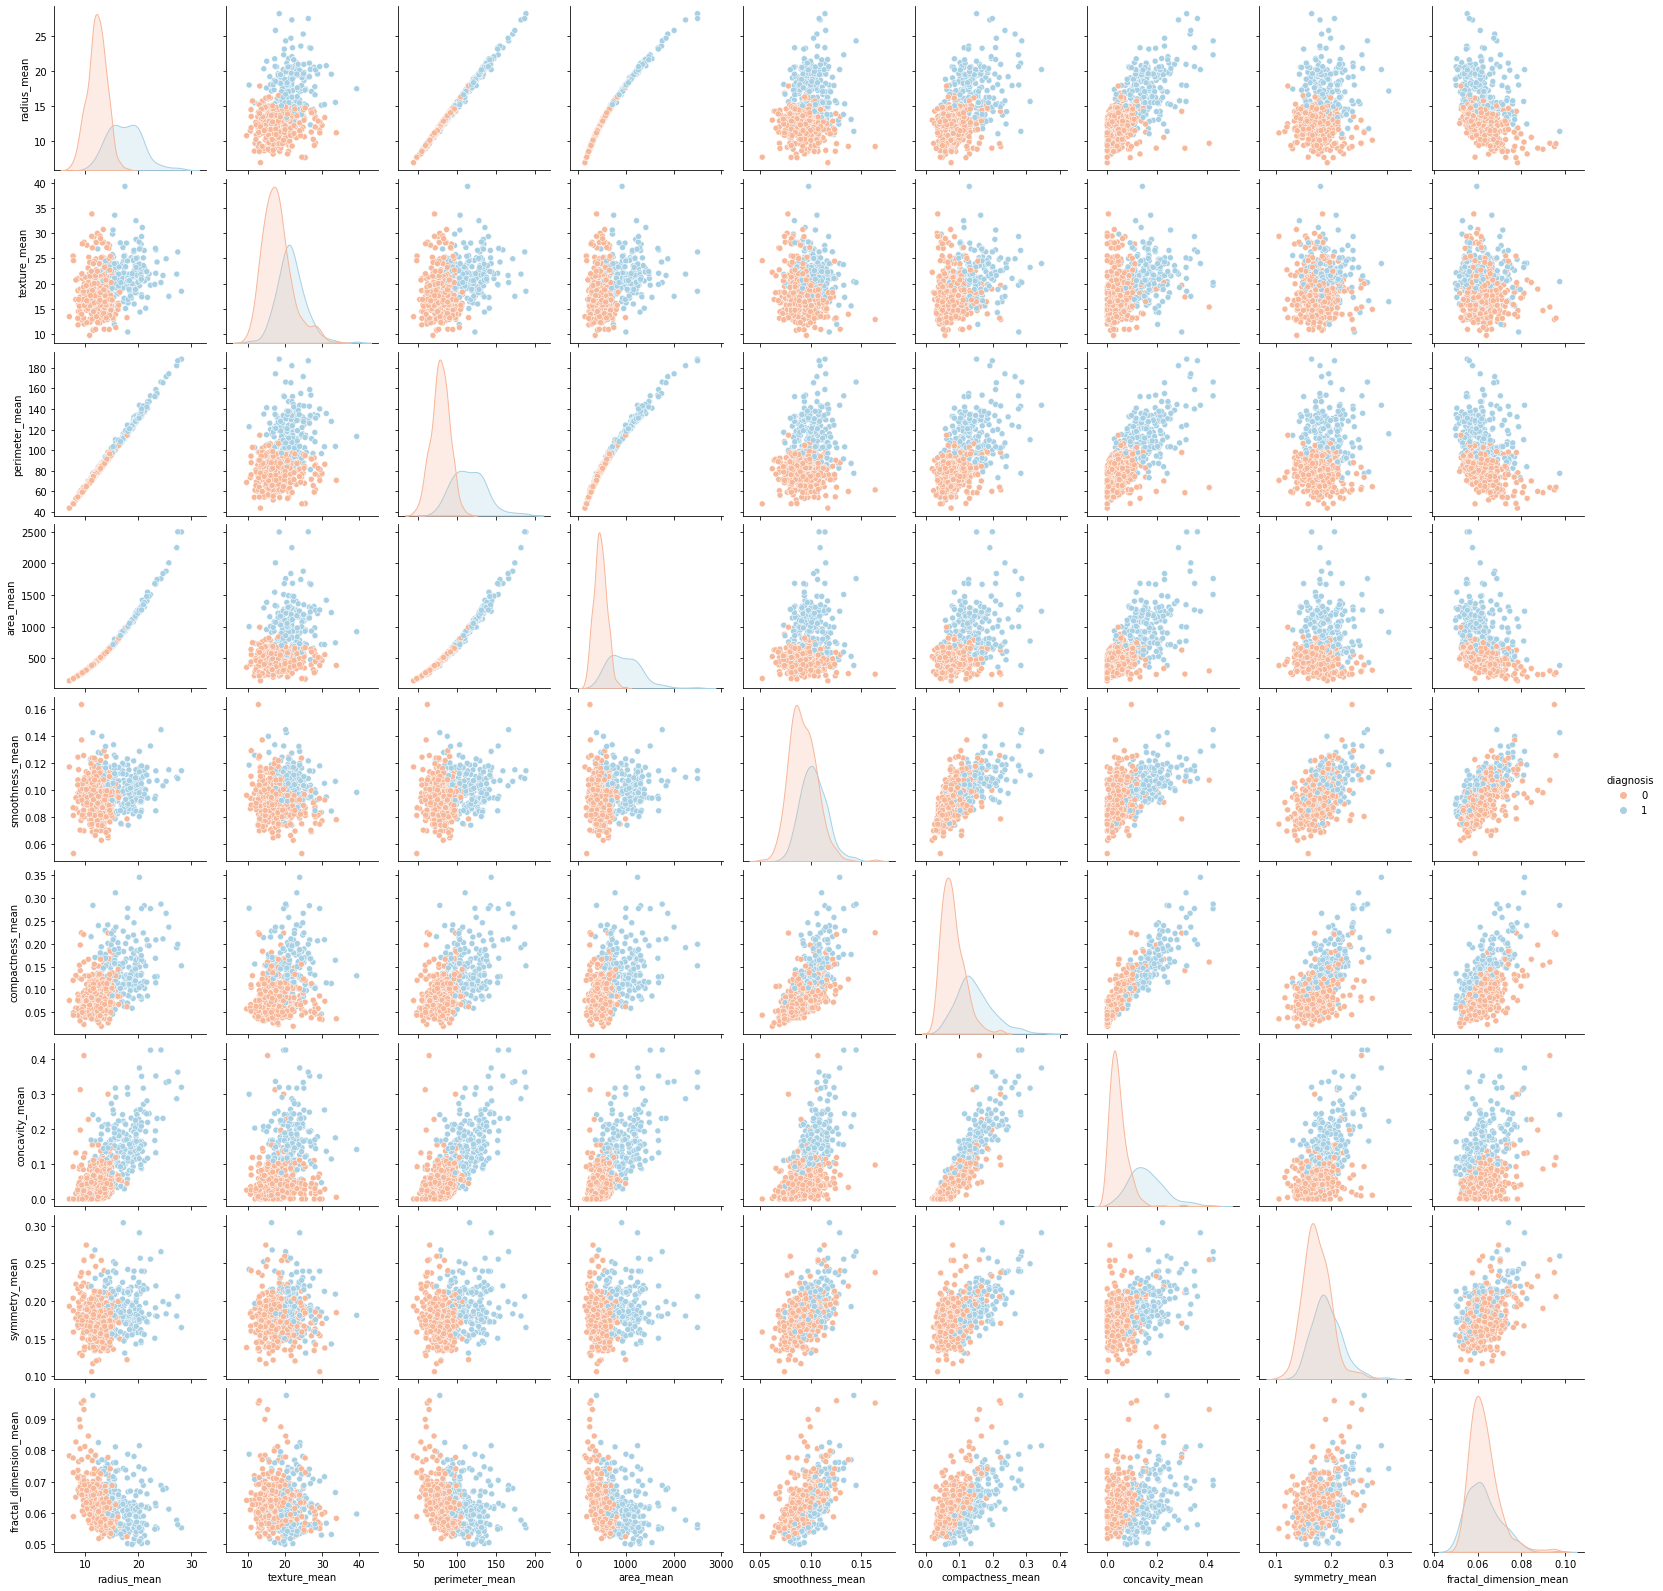

In [23]:
# generating a scatter plot matrix with the "mean" columns
# create a pair plot colored by continent with a density plot of the diagonal and format the scatter plots

cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'symmetry_mean',
        'fractal_dimension_mean'
        ]

sns.pairplot(data = data[cols], hue = 'diagnosis', palette = 'RdBu')

In [24]:
#split the feature labels

#drop the 'diagnosis' column which represent the feature which we are going to predict
X = data.drop('diagnosis', axis=1, inplace = False)

# assign 'diagnosis' column to Y variable
y = data['diagnosis']

print(X.head(2))
print(y.head(2))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654

In [25]:
from sklearn.model_selection import train_test_split

#separate the data set by 70/30 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print(X_train.shape, ' \t is the shape of Training Features')
print(y_train.shape, ' \t is the shape of Training Labels')
print(X_test.shape, ' \t is the shape of Testing Features')
print(y_test.shape, ' \t is the shape of Testing Labels')

(398, 30)  	 is the shape of Training Features
(398,)  	 is the shape of Training Labels
(171, 30)  	 is the shape of Testing Features
(171,)  	 is the shape of Testing Labels


In [47]:
#implementation of KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)




KNeighborsClassifier()

In [48]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# generate the summary of the predictions (Classification report) made by the classifier
from sklearn.metrics import classification_report

print("Classification Report: \n\n")
print(classification_report(y_test, y_pred))

Classification Report: 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

